In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv('Liver Patient Dataset (LPD)_train copy.csv', encoding='latin1')
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [15]:
# Convert categorical data to numerical values
df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 1, 'Female': 0})

# Fill missing values with the mean of the numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Feature selection
X = df.drop(columns=['Result'])  # Assuming 'Result' is the target variable
y = df['Result']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [18]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [21]:

def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("\n")

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Evaluation Metrics for Logistic Regression:
Accuracy: 0.73
Precision: 0.69
Recall: 0.73
F1 Score: 0.68


Evaluation Metrics for Support Vector Machine:
Accuracy: 0.73
Precision: 0.71
Recall: 0.73
F1 Score: 0.65


Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


Evaluation Metrics for Random Forest:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00




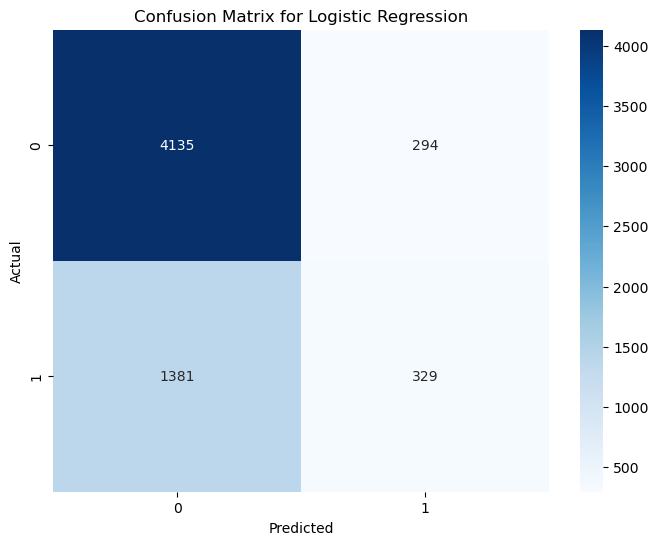

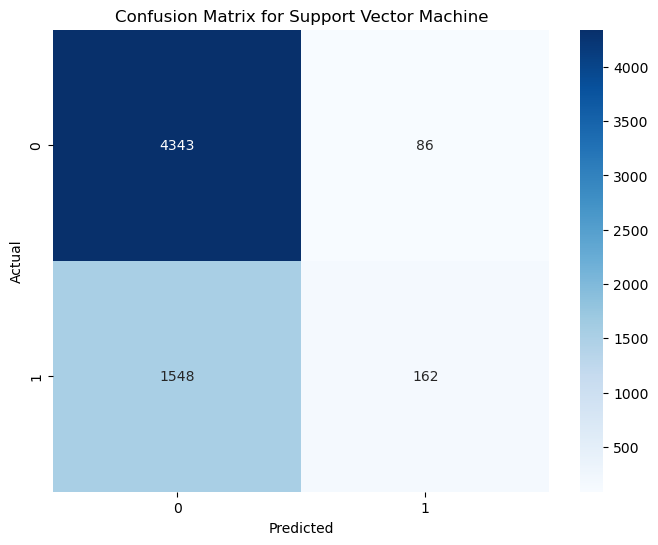

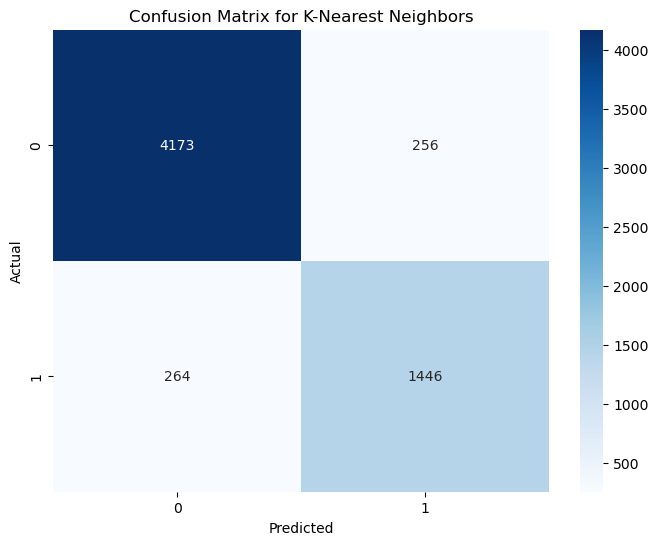

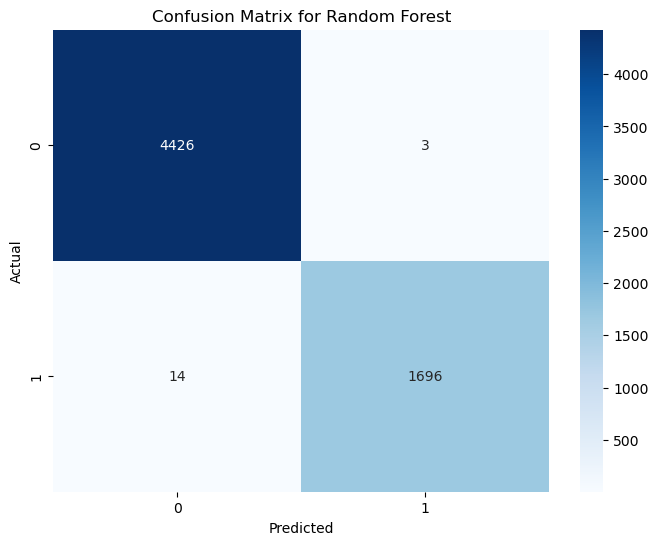

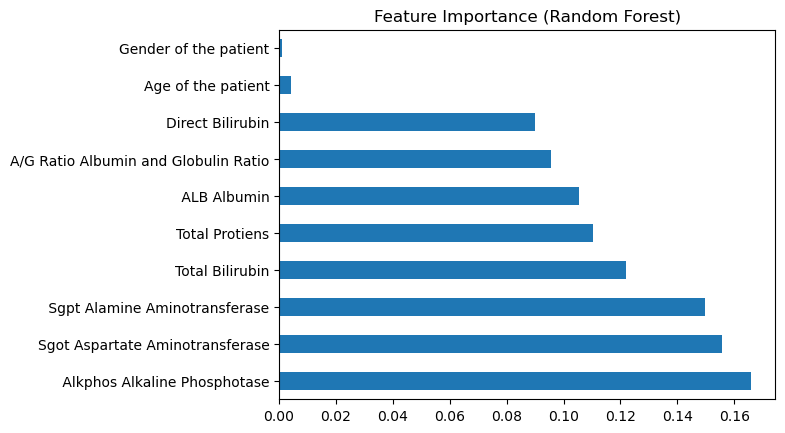

In [22]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, learning_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = best_rf_model.predict(X_test)

In [34]:
test_accuracy = accuracy_score(y_test, y_pred)

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
class_report = classification_report(y_test, y_pred)

In [37]:
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", class_report)

Test Accuracy: 0.9970679263723734
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4429
           2       1.00      0.99      0.99      1710

    accuracy                           1.00      6139
   macro avg       1.00      1.00      1.00      6139
weighted avg       1.00      1.00      1.00      6139



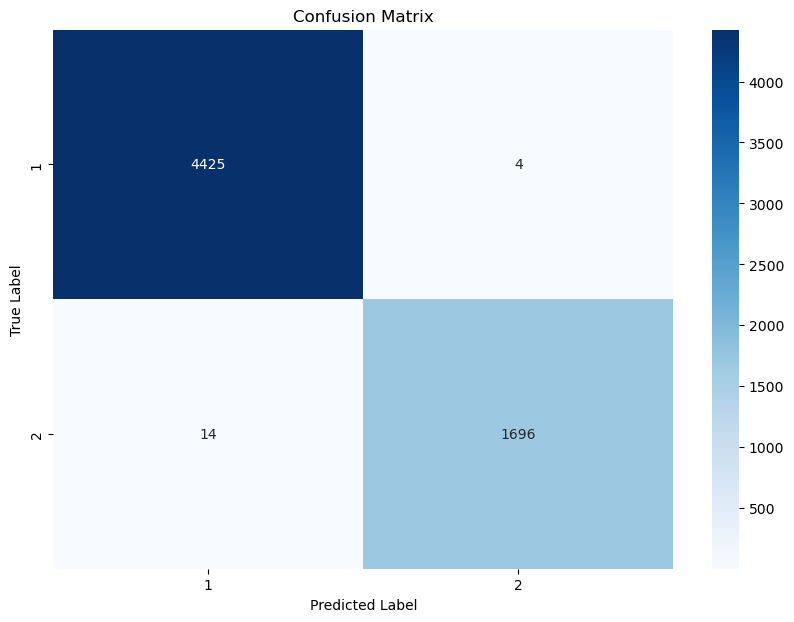

In [38]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [39]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.99613113 0.99613113 0.99633401 0.99613035 0.99572301]
Mean Cross-Validation Score: 0.9960899282171741


In [40]:
tree_depths = [estimator.tree_.max_depth for estimator in best_rf_model.estimators_]
print("Tree Depths:", tree_depths)
print("Average Tree Depth:", np.mean(tree_depths))

Tree Depths: [25, 25, 21, 27, 22, 18, 26, 21, 22, 24, 20, 19, 21, 20, 23, 18, 24, 24, 22, 20, 22, 20, 23, 19, 20, 25, 29, 20, 20, 20, 22, 21, 21, 21, 25, 25, 24, 21, 23, 20, 18, 23, 25, 28, 24, 29, 22, 18, 29, 19, 23, 23, 22, 23, 22, 21, 18, 24, 27, 25, 19, 24, 21, 20, 22, 24, 31, 19, 21, 21, 20, 28, 20, 20, 20, 20, 22, 22, 21, 24, 24, 20, 23, 22, 23, 26, 23, 27, 23, 28, 18, 21, 20, 24, 20, 24, 21, 22, 22, 23]
Average Tree Depth: 22.39


In [41]:
num_leaves = [estimator.tree_.n_leaves for estimator in best_rf_model.estimators_]
print("Number of Leaves:", num_leaves)
print("Average Number of Leaves:", np.mean(num_leaves))

Number of Leaves: [399, 407, 394, 392, 406, 410, 413, 418, 403, 379, 399, 393, 380, 420, 400, 437, 395, 384, 394, 400, 393, 402, 385, 417, 395, 396, 398, 433, 427, 385, 398, 400, 436, 419, 401, 416, 411, 403, 395, 399, 401, 411, 397, 452, 373, 393, 410, 426, 432, 396, 402, 405, 399, 422, 414, 411, 432, 381, 400, 401, 388, 475, 404, 425, 404, 382, 428, 429, 399, 384, 390, 410, 408, 444, 402, 416, 429, 408, 398, 430, 394, 419, 425, 370, 384, 394, 441, 402, 409, 389, 416, 421, 372, 404, 415, 421, 408, 388, 425, 436]
Average Number of Leaves: 406.76


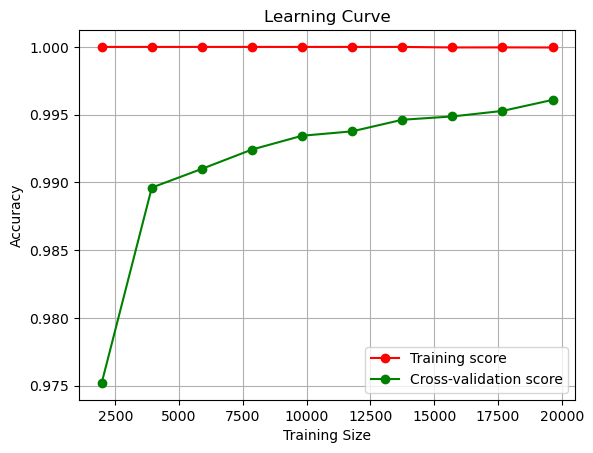

In [42]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


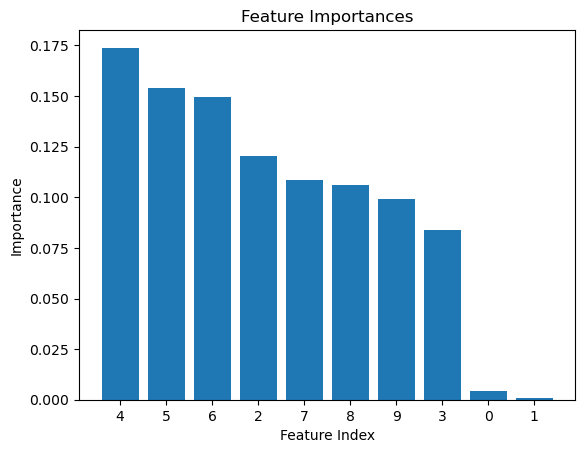

In [43]:
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()
